In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
features = list()
with open('UCI HAR Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]

print('Jumlah Fitur: {}'.format(len(features)))

Jumlah Fitur: 561


In [3]:
seen = set()
uniq_features = []
for idx, x in enumerate(features):
    if x not in seen:
        uniq_features.append(x)
        seen.add(x)
    elif x + 'n' not in seen:
        uniq_features.append(x + 'n')
        seen.add(x + 'n')
    else:
        uniq_features.append(x + 'nn')
        seen.add(x + 'nn')
len(uniq_features)

561

In [4]:
X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None, names=uniq_features)

X_train['subject'] = pd.read_csv('UCI HAR Dataset/train/subject_train.txt', header=None).squeeze("columns")

y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', names=['Activity'], header=None).squeeze("columns")
y_train_labels = y_train.map({
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
})

train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()


train.tail()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,2,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,2,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,2,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,2,WALKING_UPSTAIRS
7351,0.351503,-0.012423,-0.203867,-0.269270,-0.087212,0.177404,-0.377404,-0.038678,0.229430,0.269013,...,-0.280088,-0.007739,-0.056088,-0.616956,-0.783267,0.246809,0.036695,30,2,WALKING_UPSTAIRS


In [12]:
# Ambil kolom yang paling relevan
selected_columns = [
    'tBodyAcc-mean()-X',
    'tBodyAcc-mean()-Y',
    'tBodyAcc-mean()-Z',
    'tBodyGyro-mean()-X',
    'tBodyGyro-mean()-Y',
    'tBodyGyro-mean()-Z',
    'tGravityAcc-mean()-X',
    'tGravityAcc-mean()-Y',
    'tGravityAcc-mean()-Z',
    'ActivityName'
]

# Filter data activity "STANDING", ambil 128 baris pertama
standing_data = train[train["ActivityName"] == "WALKING_DOWNSTAIRS"].head(128)

# Tampilkan hanya kolom yang dipilih
standing_data_selected = standing_data[selected_columns]

# Tampilkan hasil
print(standing_data_selected)


     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
125           0.358455           0.017975          -0.084159   
126           0.301715          -0.007049          -0.093681   
127           0.281552          -0.016110          -0.140093   
128           0.273956          -0.022899          -0.127256   
129           0.299957           0.014082          -0.082310   
..                 ...                ...                ...   
946           0.364806           0.036603          -0.124858   
947           0.424993          -0.018164          -0.080291   
948           0.114180          -0.047295          -0.105796   
949           0.074788          -0.026592          -0.100571   
950           0.441146          -0.045429          -0.161122   

     tBodyGyro-mean()-X  tBodyGyro-mean()-Y  tBodyGyro-mean()-Z  \
125           -0.032728           -0.111062            0.135463   
126           -0.073424           -0.081083            0.111740   
127           -0.477053       

In [6]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [6]:
train.shape

(7352, 564)

In [7]:
X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None, names=uniq_features)


X_test['subject'] = pd.read_csv('UCI HAR Dataset/test/subject_test.txt', header=None).squeeze("columns")

y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt', names=['Activity']).squeeze("columns")
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
1092,0.173762,-0.096873,-0.015919,-0.888645,-0.69354,-0.784309,-0.893663,-0.649032,-0.775698,-0.832088,...,0.205565,0.615367,0.490228,-0.527291,-0.905748,0.163248,0.013416,10,4,SITTING


In [8]:
test.shape

(2947, 564)

In [10]:
print('Jumlah data duplikat pada data train: {}'.format(sum(train.duplicated())))
print('Jumlah data duplikat pada data test : {}'.format(sum(test.duplicated())))

Jumlah data duplikat pada data train: 0
Jumlah data duplikat pada data test : 0


In [11]:
print('{} nilai NaN/Null di data train'.format(train.isnull().values.sum()))
print('{} nilai NaN/Null di data test'.format(test.isnull().values.sum()))

0 nilai NaN/Null di data train
0 nilai NaN/Null di data test


In [12]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

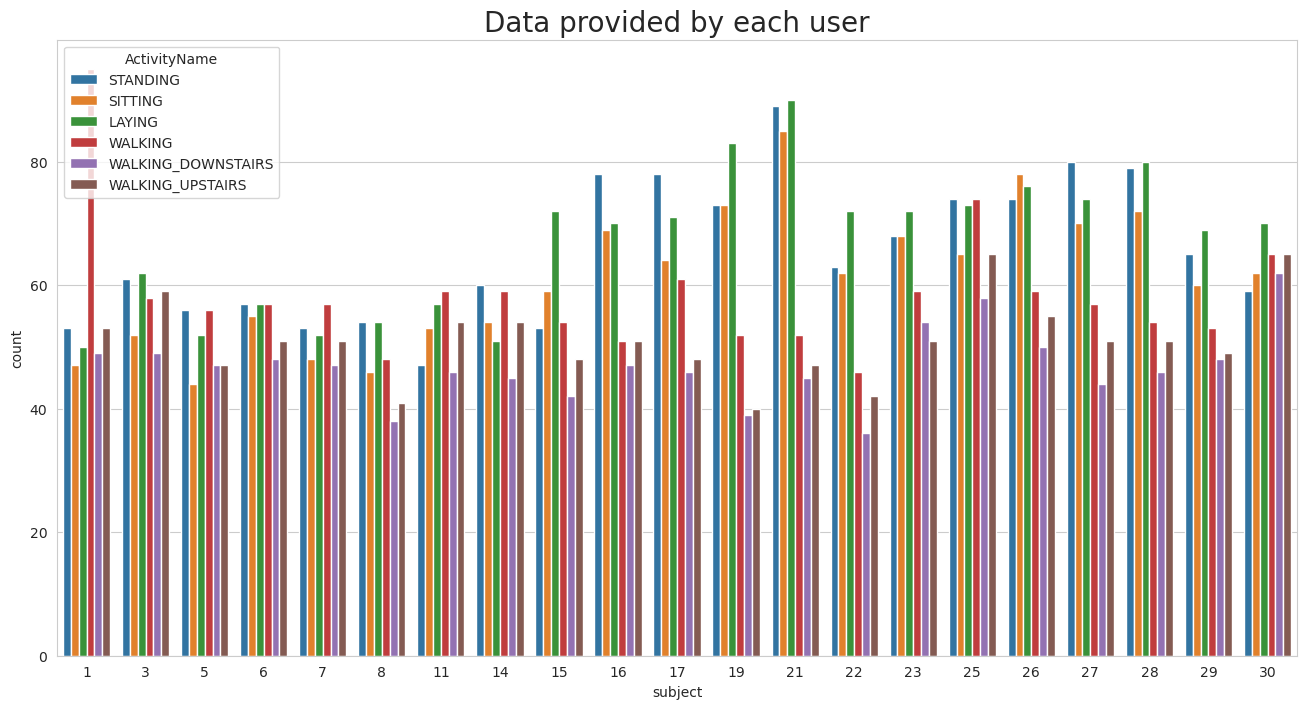

In [13]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()

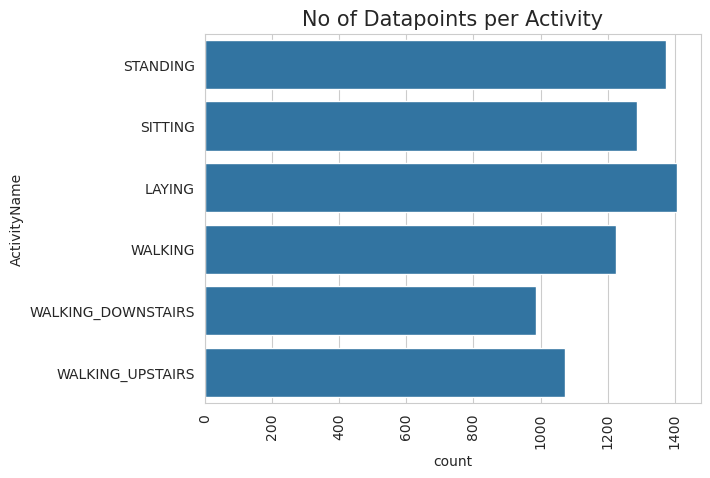

In [15]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

In [16]:
columns = train.columns

columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity',
       'ActivityName'],
      dtype='object', length=564)

In [22]:
train.to_csv('data/train.csv', index=False)
test.to_csv('data/test.csv', index=False)